<a href="https://colab.research.google.com/github/sulata2/Vino/blob/master/pytorch_pegasus_summary%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import glob
import torch.nn as nn
import os.path as osp
import torchvision
import matplotlib.pyplot as plt
import torch
#import rotateImage
import cv2
import numpy as np
#import split_folders
import random
import torch.backends.cudnn as cudnn
import torch.optim as optim
from random import choice
from collections import OrderedDict
import os

In [ ]:
import torch
from torch.autograd import Variable as V
import torchvision.models as models
from torchvision import transforms as trn
from torch.nn import functional as F

In [ ]:
#/content/Car-damage/carPartModel-305.pth
#/content/drive/My Drive/Car-part-damage/carPartModel-305.pth
#/content/drive/My Drive/Car-part-damage/carPartModel-305.pth
check = torch.load('/content/drive/My Drive/Car-part-damage/carPartModel-305.pth',map_location=torch.device('cpu'))
#model1 = torch.load('/content/Car-damage/carPartModel-305.pth')
for names in check:
  print(names)
#for name,param in model1.items():
#   if name=='state_dict':
#     print(param)
print(check["class_to_idx"])

epoch
state_dict
class_to_idx
confusion_matrix
{'glassShatterFront': 0, 'unknown': 1, 'tailLamp': 2, 'glassShatterRear': 3, 'glassShatterSide': 4, 'doorScratch': 5, 'headLamp': 6, 'bumperScratch': 7, 'multipleDamage': 8, 'doorDent': 9, 'bumperDent': 10}


In [ ]:
cm = torch.tensor([[ 90.,   0.,   0.,   2.,   2.,   0.,   0.,   1.,   3.,   0.,   0.],
        [  1., 113.,   0.,   2.,   1.,   0.,   1.,   1.,   1.,   1.,   5.],
        [  0.,   2., 110.,   3.,   2.,   1.,   3.,   3.,   0.,   0.,   4.],
        [  4.,   0.,   2., 102.,   2.,   0.,   2.,   0.,   0.,   1.,   0.],
        [  2.,   0.,   0.,   3., 102.,   2.,   1.,   0.,   1.,   2.,   0.],
        [  2.,   1.,   0.,   1.,   0.,  68.,   1.,   2.,   0.,   7.,   0.],
        [  0.,   0.,   6.,   2.,   2.,   0., 115.,   3.,   1.,   0.,   2.],
        [  1.,   0.,   3.,   0.,   1.,   3.,   8., 136.,   0.,   2.,   8.],
        [  1.,   2.,   0.,   1.,   1.,   0.,   1.,   0., 112.,   1.,   1.],
        [  0.,   2.,   1.,   0.,   1.,   7.,   1.,   1.,   0.,  85.,   4.],
        [  0.,   1.,   6.,   3.,   0.,   0.,   1.,   5.,   2.,   1.,  84.]])
cm = cm.numpy()
print(model1["class_to_idx"])

def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()

def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()
    
def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns
print(" ")
print("label precision recall")
for label in range(10):
    print(f"{label:5d} {precision(label, cm):9.3f} {recall(label, cm):6.3f}")
print(" ")
print("precision total:", precision_macro_average(cm))
print("recall total:", recall_macro_average(cm))
print("")
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements

print("accuracy:",accuracy(cm))

{'glassShatterFront': 0, 'unknown': 1, 'tailLamp': 2, 'glassShatterRear': 3, 'glassShatterSide': 4, 'doorScratch': 5, 'headLamp': 6, 'bumperScratch': 7, 'multipleDamage': 8, 'doorDent': 9, 'bumperDent': 10}
 
label precision recall
    0     0.891  0.918
    1     0.934  0.897
    2     0.859  0.859
    3     0.857  0.903
    4     0.895  0.903
    5     0.840  0.829
    6     0.858  0.878
    7     0.895  0.840
    8     0.933  0.933
    9     0.850  0.833
 
precision total: 0.8717991980639371
recall total: 0.8735195560888811

accuracy: 0.8740219


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#from PIL import Image, ImageFile
#img = Image.open("/content/drive/My Drive/IMG-20200729-WA0036.jpg")


In [ ]:
#!unzip "/content/drive/My Drive/carDamageDetection.zip" -d '/content/drive/My Drive/carDamageDetection'

In [ ]:
def load_model(checkpoint_path):
  chpt = torch.load(checkpoint_path)
  #net = torchvision.models.resnet50(pretrained=True)
  net = torchvision.models.resnet50(pretrained=False)
  fc = nn.Sequential(OrderedDict([
    ("dropout", nn.Dropout(0.4)),
    ("out", nn.Linear(2048, 11))]))
  net.fc = fc

  for param, x in net.named_parameters():
    if param.startswith("fc.out"):
        x.requires_grad = True
    else:
        x.requires_grad = False

  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  #net.class_to_idx = classes
  net = net.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)
    
  net.class_to_idx = chpt['class_to_idx']       
  net.load_state_dict(chpt['state_dict'])  
  return net

In [ ]:
the_model = load_model('/content/drive/My Drive/Car-part-damage/carPartModel-305.pth')
# /content/drive/My Drive/carDamageDetection.zip
#/content/drive/My Drive/Car-part-damage/carPartModel-305.pth
if torch.cuda.is_available():
    the_model.cuda()

In [ ]:
#map_location=lambda storage, loc: storage

In [ ]:
the_model = the_model()

if torch.cuda.is_available():
    the_model.cuda()

TypeError: ignored

In [ ]:
#image_names = os.listdir('/content/drive/My Drive/00_openvino/interior_image/imagenet_new')
import os
image_names = os.listdir('/content/drive/My Drive/Car-part-damage/splitTrainVal/splitTrainVal/test')
print(len(image_names))
#/content/drive/My Drive/Car-part-damage/splitTrainVal/splitTrainVal/test

11


In [ ]:
image_names = os.listdir('/content/drive/My Drive/Car-part-damage/splitTrainVal/splitTrainVal/test/bumperDent')
print(len(image_names))

6


In [ ]:
check = torch.load('/content/drive/My Drive/Car-part-damage/carPartModel-305.pth',map_location=torch.device('cuda'))
#model1 = torch.load('/content/Car-damage/carPartModel-305.pth')
#map_location=lambda storage, loc: storage
#check = torch.load('/content/drive/My Drive/Car-part-damage/carPartModel-305.pth',map_location=lambda storage, loc: storage)
for names in check:
  print(names)
#for name,param in model1.items():
#   if name=='state_dict':
#     print(param)
print(check["class_to_idx"])

epoch
state_dict
class_to_idx
confusion_matrix
{'glassShatterFront': 0, 'unknown': 1, 'tailLamp': 2, 'glassShatterRear': 3, 'glassShatterSide': 4, 'doorScratch': 5, 'headLamp': 6, 'bumperScratch': 7, 'multipleDamage': 8, 'doorDent': 9, 'bumperDent': 10}


In [ ]:
state_dict = {str.replace(k,'module.',''): v for k,v in check['state_dict'].items()}
the_model.load_state_dict(state_dict)
the_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
imageName = "/content/drive/My Drive/Car-part-damage/splitTrainValnew/splitTrainValnew/bumperDent/bumperDent-1.JPEG"
image = cv2.imread(imageName)
#img = cv2.resize(image, (244, 244), interpolation=cv2.INTER_AREA)

In [ ]:
import cv2
import io
import base64
import os
from imageio import imread
#image = imread(io.BytesIO(image))
output = torch.tensor([0])
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image = cv2.resize(image, (224, 224))
image = torch.tensor(image).permute((2, 0, 1))
image = image.unsqueeze(0)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  #net.class_to_idx = classes
image = image.to(device, dtype=torch.float)  
#input_img = input_img.to(device)


In [ ]:
from PIL import Image
from matplotlib import pyplot as plt
imageName = "/content/drive/My Drive/Car-part-damage/splitTrainValnew/splitTrainValnew/bumperDent/bumperDent-1.JPEG"
img = Image.open(imageName)
#img.shape   this is not array

In [ ]:
#input_img = V(centre_crop(img).unsqueeze(0))

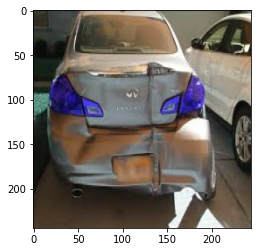

In [ ]:
plt.imshow(img)

In [ ]:
# forward pass
logit = the_model(image)
#h_x = F.softmax(logit, 1).data.squeeze()
#probs, idxs = h_x.sort(0, True)
maxOut = torch.max(logit.data, 1)
#val1 = torch(output)
dict1Value = (list(check["class_to_idx"].keys())[list(check["class_to_idx"].values()).index(maxOut.indices.item())])
#dict1Value = list(check["class_to_idx"].keys())[list(check["class_to_idx"].values()).index(val1))]
print(dict1Value)


bumperDent


In [ ]:
#testing with multiple images 
image_names = os.listdir('/content/drive/My Drive/Car-part-damage/splitTrainVal/splitTrainVal/test/bumperDent')
print(len(image_names))

6


In [ ]:
#/content/drive/My Drive/Car-part-damage/00-damage.zip
#!unzip splitTrainVal.zip
#!unzip "/content/drive/My Drive/Car-part-damage/00-damage.zip" -d '/content/drive/My Drive/carDamageDetection'
!unzip "/content/drive/My Drive/latest_data.zip" -d '/content/drive/My Drive/carDamageDetection'

Archive:  /content/drive/My Drive/latest_data.zip
   creating: /content/drive/My Drive/carDamageDetection/renamed2/
  inflating: /content/drive/My Drive/carDamageDetection/renamed2/1.jpeg  
  inflating: /content/drive/My Drive/carDamageDetection/renamed2/10.jpeg  
  inflating: /content/drive/My Drive/carDamageDetection/renamed2/100.jpeg  
  inflating: /content/drive/My Drive/carDamageDetection/renamed2/1000.jpeg  
  inflating: /content/drive/My Drive/carDamageDetection/renamed2/1001.jpeg  
  inflating: /content/drive/My Drive/carDamageDetection/renamed2/1002.jpeg  
  inflating: /content/drive/My Drive/carDamageDetection/renamed2/1004.jpeg  
  inflating: /content/drive/My Drive/carDamageDetection/renamed2/1005.jpeg  
  inflating: /content/drive/My Drive/carDamageDetection/renamed2/1006.jpeg  
  inflating: /content/drive/My Drive/carDamageDetection/renamed2/1008.jpeg  
  inflating: /content/drive/My Drive/carDamageDetection/renamed2/1009.jpeg  
  inflating: /content/drive/My Drive/carDam

In [ ]:
# indices can be mapped to original classes in dataset
idx_to_class = {v: k for k, v in the_model.class_to_idx.items()}

# Map the classes to flower category lables                              
#names = list(map(lambda x: cat_to_name[f"{idx_to_class[x]}"], idxs))
arch = 'resnet50'

In [ ]:
image_names = image_names[:-1]
# print(image_names)

print(image_names)
print(len(image_names))

['bumperDent-122.jpeg', 'bumperDent-64.jpeg', 'bumperDent-71.jpeg', 'bumperDent-110.jpeg', 'bumperDent-89.jpeg']
5


In [ ]:
def find(value, dictionary):
    for k, v in dictionary.items():
        if v == value:
            yield k
        
example = {'glassShatterFront': 0, 'unknown': 1, 'tailLamp': 2, 'glassShatterRear': 3, 'glassShatterSide': 4, 'doorScratch': 5, 'headLamp': 6, 'bumperScratch': 7, 'multipleDamage': 8, 'doorDent': 9, 'bumperDent': 10}

#val7 = list(find(9,example))

#print(val7[0]) 

doorDent


In [ ]:
IndexError: list index out of range

In [ ]:
# load the class label
#file_name = 'categories_places365.txt'
#if not os.access(file_name, os.W_OK):
#    synset_url = 'https://raw.githubusercontent.com/csailvision/places365/master/categories_places365.txt'
#    os.system('wget ' + synset_url)

#filepath = '/content/drive/My Drive/kaggle_text.txt'
#filepath = '/content/drive/My Drive/kaggle_text.txt'
filepath = '/content/drive/My Drive/latest_text2.txt'

classes = list()
val4 = list()
class_dict={}
example = {'glassShatterFront': 0, 'unknown': 1, 'tailLamp': 2, 'glassShatterRear': 3, 'glassShatterSide': 4, 'doorScratch': 5, 'headLamp': 6, 'bumperScratch': 7, 'multipleDamage': 8, 'doorDent': 9, 'bumperDent': 10}

with open(filepath) as class_file:
    for line in class_file:
  
        val2 = line.split()[1]
        #print(val2)
        val5 = line.split()[0]
        #print(val5)
        
        class_dict[val5] = val2
        #classes.append(val2)
        #classes.append(line.strip().split(' ')[0][3:])
        #classes.append(line.split()[0])  # showing the image name
        classes.append(line.split()[1])
       
classes = tuple(classes)
print(classes)
print(class_dict)

('6', '5', '6', '4', '2', '10', '5', '10', '9', '9', '4', '6', '10', '4', '9', '6', '9', '2', '9', '4', '7', '5', '2', '5', '2', '6', '9', '10', '5', '5', '9', '10', '4', '10', '9', '5', '2', '9', '7', '9', '9', '5', '2', '2', '0', '4', '4', '9', '6', '0', '9', '10', '4', '10', '10', '9', '5', '7', '10', '9', '2', '6', '5', '9', '7', '10', '5', '5', '0', '0', '10', '10', '5', '5', '6', '2', '9', '5', '5', '2', '10', '5', '9', '7', '5', '7', '0', '6', '6', '9', '5', '5', '2', '6', '9', '0', '10', '0', '9', '10', '2', '6', '10', '0', '9', '5', '2', '7', '5', '5', '7', '0', '2', '5', '10', '2', '4', '6', '4', '5', '2', '9', '9', '9', '4', '4', '5', '9', '9', '2', '9', '9', '6', '7', '2', '10', '4', '6', '9', '10', '9', '5', '5', '4', '6', '10', '7', '0', '7', '9', '10', '5', '2', '9', '7', '4', '2', '10', '2', '0', '0', '9', '7', '9', '7', '6', '7', '2', '6', '5', '9', '6', '9', '9', '6', '6', '3', '2', '3', '10', '5', '4', '7', '7', '7', '2', '9', '9', '9', '5', '0', '7', '10', '10', '2'

In [ ]:
txt = "welcome to the jungle"

x = txt.split()
x1 = x[0]

print(x1)

welcome


In [ ]:
print([v for k,v in class_dict.items() if k == file ]) 

['8']


In [ ]:
arch = 'resnet50'
correct = 0 
cntimg = 0
#rootdir = "/content/drive/My Drive/Car-part-damage/splitTrainVal/splitTrainVal/test/"
rootdir = "/content/drive/My Drive/carDamageDetection/00-damage/"
rootdir = "/content/drive/My Drive/carDamageDetection/renamed2/"
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        image = cv2.imread(os.path.join(subdir, file)) 
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        image = cv2.resize(image, (224, 224))
        image = torch.tensor(image).permute((2, 0, 1))
        image = image.unsqueeze(0)
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  
        image = image.to(device, dtype=torch.float) 
        logit = the_model(image)
        h_x = F.softmax(logit, 1).data.squeeze()
        prob1 = torch.exp(logit)
        
        probs, idx = h_x.sort(0, True)
        
        # adding for fetching respective class name 
        my_dict = {'glassShatterFront': 0, 'unknown': 1, 'tailLamp': 2, 'glassShatterRear':3, 'glassShatterSide': 4, 
                  'doorScratch': 5, 'headLamp': 6, 'bumperScratch': 7, 'multipleDamage': 8, 'doorDent': 9, 'bumperDent': 10}
        key_list = list(my_dict.keys()) 
        val_list = list(my_dict.values()) 
        
        #print([k for k,v in my_dict.items() if v == int(ind)])  
        maxOut = torch.max(logit.data, 1)
      
        dict1Value = (list(check["class_to_idx"].keys())[list(check["class_to_idx"].values()).index(maxOut.indices.item())])    
        
        print('\n\n{} prediction on {}'.format(arch,file))
  # output the prediction for high probability value
        print('Predicted: ', dict1Value)
        # get the class number by scanning image name in class_dict
        actual_class_num = list( [v for k,v in class_dict.items() if k == file ])
        # from list copy to str
        actual_class_num1 = actual_class_num[0]
        
        actual_class = [k for k,v in my_dict.items() if v == int(actual_class_num1)]
        actual_class_str = actual_class[0]
        cntimg +=1
        print('Actual: ', actual_class_str, 'Predicted: ', dict1Value)
        print('probs.max(1)[1]', prob1.max(1)[1])
  # max 3 probabiliies showing below 
        for i in range(0, 1): 
          print(idx[i])      
          ind = classes[idx[i]] 
          print('{}  {:.3f} {}'.format(classes[idx[i]], probs[i], [k for k,v in my_dict.items() if v == int(ind)] ))
        if actual_class_str == dict1Value:
      # print('Adding')
           correct +=1
           
print('\n  Accuracy of the network on the 230 test images: %d %%' % (100 * correct / 850))  
print(correct)   
print(cntimg)




resnet50 prediction on 148.jpeg
Predicted:  headLamp
Actual:  tailLamp Predicted:  headLamp
probs.max(1)[1] tensor([6], device='cuda:0')
tensor(6, device='cuda:0')
5  0.865 ['doorScratch']


resnet50 prediction on 44.jpeg
Predicted:  doorScratch
Actual:  doorScratch Predicted:  doorScratch
probs.max(1)[1] tensor([5], device='cuda:0')
tensor(5, device='cuda:0')
10  0.885 ['bumperDent']


resnet50 prediction on 3.jpeg
Predicted:  headLamp
Actual:  headLamp Predicted:  headLamp
probs.max(1)[1] tensor([6], device='cuda:0')
tensor(6, device='cuda:0')
5  0.454 ['doorScratch']


resnet50 prediction on 189.jpeg
Predicted:  tailLamp
Actual:  tailLamp Predicted:  tailLamp
probs.max(1)[1] tensor([2], device='cuda:0')
tensor(2, device='cuda:0')
6  0.892 ['headLamp']


resnet50 prediction on 153.jpeg
Predicted:  bumperDent
Actual:  bumperDent Predicted:  bumperDent
probs.max(1)[1] tensor([10], device='cuda:0')
tensor(10, device='cuda:0')
4  0.775 ['glassShatterSide']


resnet50 prediction on 217.

In [ ]:
print(correct)

617


In [ ]:
from imageio import imread

In [ ]:
correct = 0
rootdir = "/content/drive/My Drive/Car-part-damage/splitTrainVal/splitTrainVal/test/"
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        image = cv2.imread(os.path.join(subdir, file)) 
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        image = cv2.resize(image, (224, 224))
        image = torch.tensor(image).permute((2, 0, 1))
        image = image.unsqueeze(0)
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  #net.class_to_idx = classes
        image = image.to(device, dtype=torch.float) 
        logit = the_model(image)
        h_x = F.softmax(logit, 1).data.squeeze()
        probs, idx = h_x.sort(0, True)
#
        print('\n\n{} prediction on {}'.format(arch,file))
  # output the prediction
        maxOut = torch.max(logit.data, 1)
#val1 = torch(output)
        dict1Value = (list(check["class_to_idx"].keys())[list(check["class_to_idx"].values()).index(maxOut.indices.item())])
        print(dict1Value)
        for i in range(0, 3):
          #  print('{}  {:.4f}'.format( probs[i]))
          print('{:.4f}'.format(probs[i]))
        actual_class = image_name[:-7]
        #print('Actual: ', actual_class, 'Predicted: ', dict1Value)
       # if(actual_class == dict1Value ):
      # print('Adding')
     #     correct +=1
     #     break

#print('\n Top-5 Accuracy of the network on the 40 test images: %d %%' % (100 * correct / 65))
           



resnet50 prediction on bumperDent-122.jpeg
bumperDent
0.3628
0.2529
0.2486


resnet50 prediction on bumperDent-64.jpeg
bumperDent
0.3564
0.3283
0.1711


resnet50 prediction on bumperDent-71.jpeg
bumperDent
0.8128
0.1775
0.0063


resnet50 prediction on bumperDent-110.jpeg
bumperDent
0.8518
0.1243
0.0188


resnet50 prediction on bumperDent-89.jpeg
bumperDent
0.8150
0.0675
0.0453


resnet50 prediction on bumperDent-6.JPEG
bumperScratch
0.6177
0.2711
0.0685


resnet50 prediction on bumperScratch-53.jpeg
bumperDent
0.6536
0.2756
0.0372


resnet50 prediction on bumperScratch-74.jpeg
bumperScratch
0.9301
0.0383
0.0263


resnet50 prediction on bumperScratch-113.jpeg
bumperScratch
0.6987
0.2783
0.0113


resnet50 prediction on bumperScratch-3.jpeg
bumperDent
0.5421
0.3344
0.0662


resnet50 prediction on bumperScratch-18.JPEG
bumperScratch
0.8591
0.1254
0.0099


resnet50 prediction on bumperScratch-102.jpg
bumperDent
0.3663
0.3018
0.1920


resnet50 prediction on bumperScratch-170.jpg
headLamp
0

In [ ]:
dummy_input = torch.randn(1, 3, 224, 224, device='cuda')
onnx_path =  "/content/pytorch_ONNx.onnx"

torch.onnx.export(the_model, dummy_input, onnx_path, verbose=False)
print('Model exported to ' + onnx_path)

Model exported to /content/pytorch_ONNx.onnx


In [ ]:
dummy_input = torch.randn(1, 3, 224, 224, device='cuda')

In [ ]:
#PyTorch Profiler
import torch.autograd.profiler as profiler

In [ ]:
with profiler.profile(record_shapes=True) as prof:
    with profiler.record_function("model_inference"):
        the_model(dummy_input)

In [ ]:
print(prof.key_averages().table(sort_by="cpu_time_total", row_limit=20))

---------------------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  
Name                         Self CPU total %  Self CPU total   CPU total %      CPU total        CPU time avg     Number of Calls  
---------------------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  
model_inference              48.36%           60.957ms         100.00%          126.044ms        126.044ms        1                
conv2d                       3.26%            4.109ms          22.15%           27.916ms         526.710us        53               
convolution                  0.19%            245.032us        18.89%           23.806ms         449.178us        53               
_convolution                 0.83%            1.049ms          18.69%           23.561ms         444.555us        53               
cudnn_convolution            11.38%           14.338ms         17.76%      

In [ ]:
with profiler.profile(profile_memory=True, record_shapes=True) as prof:
    the_model(dummy_input)

print(prof.key_averages().table(sort_by="self_cpu_memory_usage", row_limit=20))

---------------------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  
Name                         Self CPU total %  Self CPU total   CPU total %      CPU total        CPU time avg     CPU Mem          Self CPU Mem     CUDA Mem         Self CUDA Mem    Number of Calls  
---------------------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  
conv2d                       1.34%            208.726us        43.73%           6.830ms          128.877us        0 b              0 b              43.33 Mb         0 b              53               
convolution                  1.45%            226.232us        42.39%           6.622ms          124.938us        0 b              0 b              43.33 Mb         0 b              53               

In [ ]:
print(prof.key_averages().table(sort_by="cpu_memory_usage", row_limit=20))

---------------------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  
Name                         Self CPU total %  Self CPU total   CPU total %      CPU total        CPU time avg     CPU Mem          Self CPU Mem     CUDA Mem         Self CUDA Mem    Number of Calls  
---------------------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  
conv2d                       1.34%            208.726us        43.73%           6.830ms          128.877us        0 b              0 b              43.33 Mb         0 b              53               
convolution                  1.45%            226.232us        42.39%           6.622ms          124.938us        0 b              0 b              43.33 Mb         0 b              53               

In [ ]:
#!unzip '/content/Car-damage/splitTrainValnew.zip' -d '/content/Car-damage/splitTrainValnew' 

In [3]:
!pip uninstall tensorflow

Uninstalling tensorflow-2.4.1:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.4.1


In [1]:
!pip install transformers

     |████████████████████████████████| 2.1MB 5.5MB/s 
     |████████████████████████████████| 3.3MB 18.1MB/s 
     |████████████████████████████████| 901kB 36.3MB/s 


In [4]:
from transformers import pipeline

In [6]:
!pip install spacy==2.0.12

     |████████████████████████████████| 22.0MB 141kB/s 
     |████████████████████████████████| 81kB 9.6MB/s 
     |████████████████████████████████| 1.2MB 14.1MB/s 
     |████████████████████████████████| 184kB 40.0MB/s 
     |████████████████████████████████| 153kB 41.4MB/s 
     |████████████████████████████████| 604kB 38.7MB/s 
     |████████████████████████████████| 245kB 19.3MB/s 
     |████████████████████████████████| 450kB 40.8MB/s 
  Created wheel for spacy: filename=spacy-2.0.12-cp37-cp37m-linux_x86_64.whl size=28971875 sha256=251436c88468ec4893cc82346f77b68ef022ceccf9215765652dbb6f1d340bf7
  Stored in directory: /root/.cache/pip/wheels/60/0b/bb/7c2e28db574dbb2358176934eddd32a1c5f838ba0bc23eaaab
  Created wheel for murmurhash: filename=murmurhash-0.28.0-cp37-cp37m-linux_x86_64.whl size=42758 sha256=e18449ac1bcaa424b3a96c5d015961590352658a9903fc10ebb5a101631a3d0f
  Stored in directory: /root/.cache/pip/wheels/b8/94/a4/f69f8664cdc1098603df44771b7fec5fd1b3d8364cdd83f512
  Creat

In [9]:
!pip install bert-extractive-summarizer

     |████████████████████████████████| 133kB 8.0MB/s 
  Found existing installation: cymem 1.31.2
    Uninstalling cymem-1.31.2:
      Successfully uninstalled cymem-1.31.2
  Found existing installation: preshed 1.0.1
    Uninstalling preshed-1.0.1:
      Successfully uninstalled preshed-1.0.1


In [11]:
!pip install sentencepiece

     |████████████████████████████████| 1.2MB 4.1MB/s 


In [13]:
from transformers import AutoTokenizer, AutoModel
  
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")

model = AutoModel.from_pretrained("facebook/bart-large-cnn")

In [18]:
from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')


In [23]:
ARTICLE_TO_SUMMARIZE = """Agent: Thank you for Calling, Rocket Speed Internet. My name is JERRY, May I please have your Phone or Account Number? Customer: I'm sorry, can you please, repeat yourself?
Agent: I'm sorry, can you hear me OK now? I was asking you, about your Phone or Account Number?
Customer: Well, before I give you my account information, I just wanna let you know that I'm really pissed.  I can't access my email for almost a week now. I'm paying you guys lots of money, and you can't even provide a decent service. What's wrong with you people? YOURSERVICE SUCKS!!!
Agent: I'm really sorry for the inconvenience, I would probably feel the same way if I'm in your situation. But, don't worry, I promise you that we'll get your issue resolved. Let me get first your account number so we can check your account, would that be ok?!
Customer: Sure, my account number is 860-995-****. Agent: Got it, may I please verify the name on the account?
Customer: It's Robert W. Smith, I am the account holder.Agent: Can we call you back at the same number, or do you have a better call back number?
Customer: I'm sorry, I'm having a hard time hearing, can you please, repeat yourself?
Agent: Sure, I was just asking you, if we can call you at the same number you gave me, or if you have a better call back number?
Customer: Yes, that's a good call back number.
Agent: Ok, based on our test results, it shows here that you are not getting a DSL signal, that's why you can't get online or check your email. We can actually fix this problem over the phone, but, I will need to walk you through on some steps, would that be ok?
Customer: I've gone through the steps, believe me, I've checked everything before calling you! Agent: Oh, that's good then, but, can you at least, check for me which lights are lit up on your modem.
Customer: Fine! I have Power and Ethernet lights green on my modem. But, the 3rd light is flashing red, which is the DSL light. Are you happy now?
Agent: Thank you for your patience! As you could notice, the DSL light is flashing red on your modem. That means that you are not getting any dsl signal. The good thing is, based on our initial test results here, we do not have network problems or outages in your area. That means, we might be able to fix the problem over the phone!
Customer: Well, that's good then, I'll be a happy camper!
Agent: You might have already checked on it. But, since we have the DSL light flashing red on your modem, it's telling you right away that there could be something wrong on the DSL line. It's the gray phone cord at the back part of the modem.
Customer: It's right behind my desk, do you want me to crawl down the floor again?
Agent: Well, If I send someone out, and they find out that there's just a loose phone cord, then, you will get charge for the dispatch. So, we want to resolve the problem over the phone, so we could avoid dispatch charges. It will also save your time, that's all we need to check.
Customer: Ok, but, this is the last step that I'll do. Don't hang up.Agent: Don't worry, I won't hang up on you.
Customer: Oh my goodness, the gray phone cord was just loose, let me plug that in...  Oh my, there's now a steady green light on the DSL light of the modem, let me just try now the Internet!
Agent: Wow, that's good to know. Let's just see if you can now get online, before we hang up. Can you try one or two more websites?
Customer: Jerry, you are a miracle worker! Thank you so much! It got me now on my homepage and email!
Agent: No, you did a great job, I was just giving you the steps! You did great today! But, do you have anymore questions or other concerns? Customer: I feel so stupid for calling you about this. But, I surely appreciate your time and patience!
Agent: You are welcome. We are open 24 by 7 just in case that you'll need our help again. And, again, my name is JERRY, we do value your business and thank you for choosing Rocket Speed Internet. Have a blessed day!"""
inputs = tokenizer([ARTICLE_TO_SUMMARIZE], max_length=1024, return_tensors='pt')
# Generate Summary
summary_ids = model.generate(inputs['input_ids'], num_beams=4, max_length=5, early_stopping=True)
print([tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False, truncation=True ) for g in summary_ids])

['Customer:']


In [24]:
print(summary_ids)

tensor([[    2,     0, 44799,    35,     2]])


In [30]:
inputs = tokenizer([ARTICLE_TO_SUMMARIZE], return_tensors='pt')
# Generate Summary
summary_ids = model.generate(inputs['input_ids'], num_beams=5, max_length=100, early_stopping=True)
print([tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False, truncation=True ) for g in summary_ids])

["Customer: I can't access my email for almost a week now. I'm paying you guys lots of money, and you can't even provide a decent service. What's wrong with you people? YOURSERVICE SUCKS!!! Agent: I'm really sorry for the inconvenience, I promise you that we'll get your issue resolved."]


In [31]:
inputs = tokenizer([ARTICLE_TO_SUMMARIZE], return_tensors='pt')
# Generate Summary
summary_ids = model.generate(inputs['input_ids'], num_beams=10, max_length=300, early_stopping=True)
print([tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False ) for g in summary_ids])

["Customer: I can't access my email for almost a week now. I'm paying you guys lots of money, and you can't even provide a decent service. What's wrong with you people? YOURSERVICE SUCKS!!! Agent: I'm really sorry for the inconvenience, I promise you that we'll get your issue resolved."]


In [16]:
body3 = '''
Agent: Thank you for Calling, Rocket Speed Internet. My name is JERRY, May I please have your Phone or Account Number? Customer: I'm sorry, can you please, repeat yourself?
Agent: I'm sorry, can you hear me OK now? I was asking you, about your Phone or Account Number?
Customer: Well, before I give you my account information, I just wanna let you know that I'm really pissed.  I can't access my email for almost a week now. I'm paying you guys lots of money, and you can't even provide a decent service. What's wrong with you people? YOURSERVICE SUCKS!!!
Agent: I'm really sorry for the inconvenience, I would probably feel the same way if I'm in your situation. But, don't worry, I promise you that we'll get your issue resolved. Let me get first your account number so we can check your account, would that be ok?!
Customer: Sure, my account number is 860-995-****. Agent: Got it, may I please verify the name on the account?
Customer: It's Robert W. Smith, I am the account holder.Agent: Can we call you back at the same number, or do you have a better call back number?
Customer: I'm sorry, I'm having a hard time hearing, can you please, repeat yourself?
Agent: Sure, I was just asking you, if we can call you at the same number you gave me, or if you have a better call back number?
Customer: Yes, that's a good call back number.
Agent: Ok, based on our test results, it shows here that you are not getting a DSL signal, that's why you can't get online or check your email. We can actually fix this problem over the phone, but, I will need to walk you through on some steps, would that be ok?
Customer: I've gone through the steps, believe me, I've checked everything before calling you! Agent: Oh, that's good then, but, can you at least, check for me which lights are lit up on your modem.
Customer: Fine! I have Power and Ethernet lights green on my modem. But, the 3rd light is flashing red, which is the DSL light. Are you happy now?
Agent: Thank you for your patience! As you could notice, the DSL light is flashing red on your modem. That means that you are not getting any dsl signal. The good thing is, based on our initial test results here, we do not have network problems or outages in your area. That means, we might be able to fix the problem over the phone!
Customer: Well, that's good then, I'll be a happy camper!
Agent: You might have already checked on it. But, since we have the DSL light flashing red on your modem, it's telling you right away that there could be something wrong on the DSL line. It's the gray phone cord at the back part of the modem.
Customer: It's right behind my desk, do you want me to crawl down the floor again?
Agent: Well, If I send someone out, and they find out that there's just a loose phone cord, then, you will get charge for the dispatch. So, we want to resolve the problem over the phone, so we could avoid dispatch charges. It will also save your time, that's all we need to check.
Customer: Ok, but, this is the last step that I'll do. Don't hang up.Agent: Don't worry, I won't hang up on you.
Customer: Oh my goodness, the gray phone cord was just loose, let me plug that in...  Oh my, there's now a steady green light on the DSL light of the modem, let me just try now the Internet!
Agent: Wow, that's good to know. Let's just see if you can now get online, before we hang up. Can you try one or two more websites?
Customer: Jerry, you are a miracle worker! Thank you so much! It got me now on my homepage and email!
Agent: No, you did a great job, I was just giving you the steps! You did great today! But, do you have anymore questions or other concerns? Customer: I feel so stupid for calling you about this. But, I surely appreciate your time and patience!
Agent: You are welcome. We are open 24 by 7 just in case that you'll need our help again. And, again, my name is JERRY, we do value your business and thank you for choosing Rocket Speed Internet. Have a blessed day!   '''

In [33]:
!pip install fairseq

     |████████████████████████████████| 1.7MB 4.6MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 133kB 26.2MB/s 
     |████████████████████████████████| 112kB 22.7MB/s 
     |████████████████████████████████| 645kB 17.8MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-cp37-none-any.whl size=141231 sha256=bb70314c279525f8acb0f5c190c742a551366e89e8418453be89e2a7d19ec7f9
  Stored in directory: /root/.cache/pip/wheels/e3/e2/fa/b78480b448b8579ddf393bebd3f47ee23aa84c89b6a78285c8
Successfully built antlr4-python3-runtime
ERROR: fancyimpute 0.4.3 requires tensorflow, which is not installed.
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import torch
bart = torch.hub.load('pytorch/fairseq', 'bart.large.cnn')
bart.eval()

In [9]:

article =   """Agent: Thank you for Calling, Rocket Speed Internet. My name is JERRY, May I please have your Phone or Account Number? Customer: I'm sorry, can you please, repeat yourself?
Agent: I'm sorry, can you hear me OK now? I was asking you, about your Phone or Account Number?
Customer: Well, before I give you my account information, I just wanna let you know that I'm really pissed. I can not access my email for almost a week now. I'm paying you guys lots of money, and you can't even provide a decent service. What is wrong with you people? .
Agent: I'm really sorry for the inconvenience, I would probably feel the same way if I'm in your situation. But, don't worry, I promise you that we'll get your issue resolved. Let me get first your account number so we can check your account, would that be ok?!.
Customer: Sure, my account number is 860-995-****. Agent: Got it, may I please verify the name on the account?
Customer: It's Robert W. Smith, I am the account holder.Agent: Can we call you back at the same number, or do you have a better call back number?
Customer: I'm sorry, I'm having a hard time hearing, can you please, repeat yourself?
Agent: Sure, I was just asking you, if we can call you at the same number you gave me, or if you have a better call back number?
Customer: Yes, that's a good call back number.
Agent: Ok, based on our test results, it shows here that you are not getting a DSL signal, that's why you can't get online or check your email. We can actually fix this problem over the phone, but, I will need to walk you through on some steps, would that be ok?
Customer: I've gone through the steps, believe me, I've checked everything before calling you! Agent: Oh, that's good then, but, can you at least, check for me which lights are lit up on your modem.
Customer: Fine! I have Power and Ethernet lights green on my modem. But, the 3rd light is flashing red, which is the DSL light. Are you happy now?
Agent: Thank you for your patience! As you could notice, the DSL light is flashing red on your modem. That means that you are not getting any dsl signal. The good thing is, based on our initial test results here, we do not have network problems or outages in your area. That means, we might be able to fix the problem over the phone!
Customer: Well, that's good then, I'll be a happy camper!"""
hypotheses_batch = bart.sample([article], beam=4, lenpen=2.0, max_len_b=140, min_len=55, no_repeat_ngram_size=3)
print(hypotheses_batch)

["Customer: I can not access my email for almost a week now. I'm paying you guys lots of money, and you can't even provide a decent service. Agent: I'm really sorry for the inconvenience, I would probably feel the same way if I'm in your situation. But, don't worry, I promise you that we'll get your issue resolved."]


In [ ]:
article =   '(CNN)The Palestinian Authority officially became the 123rd member of the International Criminal Court on Wednesday, a step that gives the court jurisdiction over alleged crimes in Palestinian territories. The formal accession was marked with a ceremony at The Hague, in the Netherlands, where the court is based. The Palestinians signed the ICC\'s founding Rome Statute in January, when they also accepted its jurisdiction over alleged crimes committed "in the occupied Palestinian territory, including East Jerusalem, since June 13, 2014." Later that month, the ICC opened a preliminary examination into the situation in Palestinian territories, paving the way for possible war crimes investigations against Israelis. As members of the court, Palestinians may be subject to counter-charges as well. Israel and the United States, neither of which is an ICC member, opposed the Palestinians\' efforts to join the body. But Palestinian Foreign Minister Riad al-Malki, speaking at Wednesday\'s ceremony, said it was a move toward greater justice. "As Palestine formally becomes a State Party to the Rome Statute today, the world is also a step closer to ending a long era of impunity and injustice," he said, according to an ICC news release. "Indeed, today brings us closer to our shared goals of justice and peace." Judge Kuniko Ozaki, a vice president of the ICC, said acceding to the treaty was just the first step for the Palestinians. "As the Rome Statute today enters into force for the State of Palestine, Palestine acquires all the rights as well as responsibilities that come with being a State Party to the Statute. These are substantive commitments, which cannot be taken lightly," she said. Rights group Human Rights Watch welcomed the development. "Governments seeking to penalize Palestine for joining the ICC should immediately end their pressure, and countries that support universal acceptance of the court\'s treaty should speak out to welcome its membership," said Balkees Jarrah, international justice counsel for the group. "What\'s objectionable is the attempts to undermine international justice, not Palestine\'s decision to join a treaty to which over 100 countries around the world are members." In January, when the preliminary ICC examination was opened, Israeli Prime Minister Benjamin Netanyahu described it as an outrage, saying the court was overstepping its boundaries. The United States also said it "strongly" disagreed with the court\'s decision. "As we have said repeatedly, we do not believe that Palestine is a state and therefore we do not believe that it is eligible to join the ICC," the State Department said in a statement. It urged the warring sides to resolve their differences through direct negotiations. "We will continue to oppose actions against Israel at the ICC as counterproductive to the cause of peace," it said. But the ICC begs to differ with the definition of a state for its purposes and refers to the territories as "Palestine." While a preliminary examination is not a formal investigation, it allows the court to review evidence and determine whether to investigate suspects on both sides. Prosecutor Fatou Bensouda said her office would "conduct its analysis in full independence and impartiality." The war between Israel and Hamas militants in Gaza last summer left more than 2,000 people dead. The inquiry will include alleged war crimes committed since June. The International Criminal Court was set up in 2002 to prosecute genocide, crimes against humanity and war crimes. CNN\'s Vasco Cotovio, Kareem Khadder and Faith Karimi contributed to this report.'
hypotheses_batch = bart.sample([article], beam=4, lenpen=2.0, max_len_b=140, min_len=55, no_repeat_ngram_size=3)
print(hypotheses_batch)

In [17]:
full = ''.join(model(body3, min_length=70, max_length = 160))
print(full)

TypeError: ignored

In [12]:
from summarizer import Summarizer,TransformerSummarizer

In [ ]:
# using pipeline API for summarization task
summarization = pipeline("summarization")
original_text = """
Paul Walker is hardly the first actor to die during a production. 
But Walker's death in November 2013 at the age of 40 after a car crash was especially eerie given his rise to fame in the "Fast and Furious" film franchise. 
The release of "Furious 7" on Friday offers the opportunity for fans to remember -- and possibly grieve again -- the man that so many have praised as one of the nicest guys in Hollywood. 
"He was a person of humility, integrity, and compassion," military veteran Kyle Upham said in an email to CNN. 
Walker secretly paid for the engagement ring Upham shopped for with his bride. """


In [ ]:
summary_text = summarization(original_text)[0]['summary_text']
print("Summary:", summary_text)

Summary:  Paul Walker died in November 2013 at the age of 40 after a car crash . "He was a person of humility, integrity, and compassion," Kyle Upham says . The release of "Furious 7" on Friday offers the chance for fans to remember Walker .


In [ ]:
original_text = """
Hi, thanks for calling net service. How can I help you? Hi.
To hear about that, sir. I would definitely help you with this issue, but before that may, I know your nine digit customer ID.
Sir, our system only recognizes nine digit customer ID.
Thanks, Mr Daniel, let me transfer you to our Internet Department as they are the only ones who can help you with the issue.
Thanks for calling. How may I help you.
Sorry to hear that, sir. Can you please confirm if there's uninterrupted power supply at your house, are.
We are following our standard diagnostic procedure. Currently calm down and restrain from using. Any cuss words.
Yes, my Internet keeps disconnecting. Sorry.
Oh, come on. Can you just search by my registration phone number? Sorry.
Oh that's ridiculous. Let me check. Okay, I found it it's 345-93-9420 great.
Hi.
Already told you guys. Just now my Internet keeps disconnecting. Very.
You serious? You think I'm stupid, of course there's no issue with my poor supplier at my home. So.
Came down. Did you just ask me to calm down I've been very camp. Now, however, you guys absolutely useless """

In [ ]:
summary_text = summarization(original_text)[0]['summary_text']
print("Summary:", summary_text)

Summary:  Phone number 345-93-9420 was answered by Net Service . The number is 345-9-9400 and the service is available only by the Internet Department . The service is following its standard diagnostic procedure, are. Currently calm down and restrain from using. any cuss words .


In [ ]:
!git clone https://github.com/google-research/pegasus

Cloning into 'pegasus'...
remote: Enumerating objects: 175, done.
remote: Total 175 (delta 0), reused 0 (delta 0), pack-reused 175
Receiving objects: 100% (175/175), 354.26 KiB | 2.29 MiB/s, done.
Resolving deltas: 100% (58/58), done.


In [ ]:
%cd pegasus/

/content/pegasus


In [ ]:
%cd /content/

/content


In [ ]:
!pip uninstall tensorflow-gpu

Uninstalling tensorflow-gpu-2.0.0:
  Would remove:
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
    /usr/local/lib/python3.7/dist-packages/tensorflow_core/*
    /usr/local/lib/python3.7/dist-packages/tensorflow_gpu-2.0.0.dist-info/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/tensorflow_core/include/external/curl/lib/rename.h
    /usr/local/lib/python3.7/dist-packages/tensorflow_core/include/external/curl/lib/socketpair.h
    /usr/local/lib/python3.7/dist-packages/tensorflow_core/include/external/curl/lib/vssh/ssh.h
    /usr/local/lib/python3.7/dist-packages/tensorflow_core/include/external/curl/lib/vtls/bearssl.h
Proceed (y/n)? y
  Successfully uninstalled tensorflow-gpu-2.0.0


In [ ]:
#!pip install tensorflow==2.1.0
!pip install tensorflow-gpu==1.15.2


  Using cached https://files.pythonhosted.org/packages/92/42/7bddc0d5bc169596fbd13b6e1b844f832491ab671381e483da3bf5292ca9/tensorflow_gpu-1.15.2-cp37-cp37m-manylinux2010_x86_64.whl
  Found existing installation: tensorflow-gpu 2.1.0
    Uninstalling tensorflow-gpu-2.1.0:
      Successfully uninstalled tensorflow-gpu-2.1.0


In [ ]:
!pip install tensorflow-gpu==2.1.0

  Using cached https://files.pythonhosted.org/packages/0c/e8/56ecca076108302a0bc34d509dc891086455ac31895843403ef0a71d0497/tensorflow_gpu-2.1.0-cp37-cp37m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d9/41/bbf49b61370e4f4d245d4c6051dfb6db80cec672605c91b1652ac8cc3d38/tensorboard-2.1.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/18/90/b77c328a1304437ab1310b463e533fa7689f4bfc41549593056d812fab8e/tensorflow_estimator-2.1.0-py2.py3-none-any.whl
ERROR: -ensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: -ensorflow 2.4.1 has requirement tensorboard~=2.4, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: -ensorflow 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: pegasus 0.0.1 has requirement tensorflow-gpu==1.15.2, but you'll have tensorflow-gpu 2.1.0 which is incompatible.
  Found exist

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.4.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: wheel, numpy, google-pasta, opt-einsum, astunparse, wrapt, six, h5py, keras-preprocessing, typing-extensions, protobuf, gast, tensorboard, tensorflow-estimator, grpcio, flatbuffers, absl-py, termcolor
Required-by: fancyimpute


In [ ]:
!pip show pegasus

In [ ]:
!pip install tensorflow-addons==0.7.0

     |████████████████████████████████| 993kB 18.3MB/s 


In [ ]:
!pip show tensorflow-gpu

Name: tensorflow-gpu
Version: 2.1.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: tensorboard, termcolor, six, gast, google-pasta, tensorflow-estimator, wrapt, keras-preprocessing, grpcio, keras-applications, numpy, protobuf, absl-py, scipy, astor, opt-einsum, wheel
Required-by: pegasus


In [ ]:
%cd /content

/content


In [ ]:
!pip3 install -e pegasus

Obtaining file:///content/pegasus
  Running setup.py develop for pegasus


In [ ]:
%cd /content/pegasus

/content/pegasus


In [ ]:
!ipython setup.py

[TerminalIPythonApp] WARNING | GUI event loop or pylab initialization failed
]0;IPython: content/pegasus
UnknownBackendTraceback (most recent call last)
/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.pyc in enable_matplotlib(self, gui)
   2953         # Now we must activate the gui pylab wants to use, and fix %run to take
   2954         # plot updates into account
-> 2955         self.enable_gui(gui)
   2956         self.magics_manager.registry['ExecutionMagics'].default_runner = \
   2957             pt.mpl_runner(self.safe_execfile)

/usr/local/lib/python2.7/dist-packages/IPython/terminal/interactiveshell.pyc in enable_gui(self, gui)
    512         if gui:
    513             self.active_eventloop, self._inputhook =\
--> 514                 get_inputhook_name_and_func(gui)
    515         else:
    516             self.active_eventloop = self._inputhook = None

/usr/local/lib/python2.7/dist-packages/IPython/terminal/pt_inputhooks/__init__.pyc in get_inputhoo

In [ ]:
%pwd

'/content/pegasus'

In [ ]:
!export PYTHONPATH=.
!pip install -r requirements.txt

     |████████████████████████████████| 61kB 5.0MB/s 
     |████████████████████████████████| 1.2MB 17.7MB/s 
     |████████████████████████████████| 3.0MB 35.6MB/s 
     |████████████████████████████████| 1.5MB 26.0MB/s 
     |████████████████████████████████| 3.8MB 18.6MB/s 
     |████████████████████████████████| 516.2MB 32kB/s 
     |████████████████████████████████| 516.2MB 32kB/s 
     |████████████████████████████████| 5.6MB 35.5MB/s 
     |████████████████████████████████| 368kB 27.4MB/s 
     |████████████████████████████████| 194kB 40.9MB/s 
     |████████████████████████████████| 358kB 36.0MB/s 
     |████████████████████████████████| 983kB 32.7MB/s 
     |████████████████████████████████| 706kB 32.8MB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
     |████████████████████████████████| 655kB 35.7MB/s 
     |████████████████████████████████| 368kB 37.5MB/s 
     |████████████████████████████████| 460kB 36.2MB/s 
     |████████████████████████████████| 3.0MB 16.8MB

In [ ]:
!sudo apt-get install gcc python-dev python-setuptools libffi-dev
!sudo apt-get install python-pip
!sudo pip install gsutil

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-dev is already the newest version (2.7.15~rc1-1).
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
The following additional packages will be installed:
  python-pkg-resources
Suggested packages:
  python-setuptools-doc
The following NEW packages will be installed:
  libffi-dev python-pkg-resources python-setuptools
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 613 kB of archives.
After this operation, 2,336 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-pkg-resources all 39.0.1-2 [128 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-setuptools all 39.0.1-2 [329 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libffi-dev amd64 3.2.1-8 [156 kB]
Fetched 613 kB in 2s (263 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: 

In [ ]:
!mkdir ckpt
!gsutil cp -r gs://pegasus_ckpt/ ckpt/

Copying gs://pegasus_ckpt/c4.unigram.newline.10pct.96000.model...
Copying gs://pegasus_ckpt/c4.unigram.newline.10pct.96000.vocab...
Copying gs://pegasus_ckpt/checkpoint...
Copying gs://pegasus_ckpt/model.ckpt-1500000.data-00000-of-00001...
| [4 files][  2.1 GiB/  2.1 GiB]   38.4 MiB/s                                   
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying gs://pegasus_ckpt/model.ckpt-1500000.index...
Copying gs://pegasus_ckpt/model.ckpt-1500000.meta...
Copying gs://pegasus_ckpt/aeslc/model.ckpt-32000.data-00000-of-00001...
Copying gs://pegasus_ckpt/aeslc/model.ckpt-32000.index...
Copying gs://pegasus_ckpt/aeslc/model.ckpt-32000.meta...
Copying gs://pegasus_ckpt/arxiv/model.ckpt-340000.data-00000-of-00001...
Copying gs://pegasus_ckpt/arxiv/model.ckpt-340000.index...
C

KeyboardInterrupt: ignored

In [ ]:
%pwd

'/content/pegasus'

In [ ]:
%cd /content/

/content


In [ ]:
!pip show pegasus

Name: pegasus
Version: 0.1.0
Summary: Yet another PEG parser generator
Home-page: https://github.com/qix-/pegasus
Author: Josh Junon
Author-email: josh@junon.me
License: UNKNOWN
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: 


In [ ]:
!pip uninstall pegasus

Uninstalling pegasus-0.1.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pegasus-0.1.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pegasus/*
Proceed (y/n)? y
  Successfully uninstalled pegasus-0.1.3


In [ ]:
!pip install pegasus

Processing /root/.cache/pip/wheels/64/0f/84/5c276861e3afbe9f0f1b006fd089d64c67ec3d6bd2ebd5330c/pegasus-0.1.3-cp37-none-any.whl


In [ ]:
!pip3 install pegasus

  Created wheel for pegasus: filename=pegasus-0.1.3-cp37-none-any.whl size=6489 sha256=b5a7e5277ed5b243ad8fa9a15157b712f74237974dd9e1c0fbe85fd71ae2aa59
  Stored in directory: /root/.cache/pip/wheels/64/0f/84/5c276861e3afbe9f0f1b006fd089d64c67ec3d6bd2ebd5330c
Successfully built pegasus


In [ ]:
%cd /content/

/content


In [ ]:
!pip3 install -e pegasus

Obtaining file:///content/pegasus
  Running setup.py develop for pegasus


In [ ]:
!pip install pegasus==0.0.1

ERROR: Could not find a version that satisfies the requirement pegasus==0.0.1 (from versions: 0.1.0, 0.1.1, 0.1.2, 0.1.3)
ERROR: No matching distribution found for pegasus==0.0.1


In [ ]:
!pip install pegasus==0.1.0

  Created wheel for pegasus: filename=pegasus-0.1.0-cp37-none-any.whl size=6482 sha256=2510701a137fae6a7f2d6ae8289e5785be9b982dbcdb307a044824d24073df4f
  Stored in directory: /root/.cache/pip/wheels/d6/38/cf/faa97f86fe103eed750f66404d49bc630c1abcc29a80459d70
Successfully built pegasus


In [ ]:
%cd /content/pegasus

/content/pegasus


In [ ]:
!python3 pegasus/bin/train.py --params=aeslc_transformer \
--param_overrides=vocab_filename=ckpt/pegasus_ckpt/c4.unigram.newline.10pct.96000.model \
--train_init_checkpoint=ckpt/pegasus_ckpt/model.ckpt-1500000 \
--model_dir=ckpt/pegasus_ckpt/aeslc

Traceback (most recent call last):
  File "pegasus/bin/train.py", line 18, in <module>
    from pegasus.params import all_params  # pylint: disable=unused-import
  File "/content/pegasus/pegasus/params/all_params.py", line 18, in <module>
    from pegasus.params import pegasus_params
  File "/content/pegasus/pegasus/params/pegasus_params.py", line 21, in <module>
    from pegasus.eval import text_eval
  File "/content/pegasus/pegasus/eval/text_eval.py", line 29, in <module>
    from tensorflow.contrib import summary as contrib_summary
ModuleNotFoundError: No module named 'tensorflow.contrib'


In [ ]:
#tf.test.is_gpu_available()
tf.config.list_physical_devices('GPU')

NameError: ignored

In [ ]:
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:"/usr/local/lib/python3.7/dist-packages/tensorflow_core"

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 1.15.5
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: protobuf, six, grpcio, keras-applications, tensorboard, absl-py, wrapt, numpy, google-pasta, keras-preprocessing, opt-einsum, gast, tensorflow-estimator, astor, wheel, termcolor, h5py
Required-by: tensorflow-text, fancyimpute


In [ ]:
!find . -name libtensorflow_framework.so


In [ ]:
%cd /usr/local/lib/python3.7/dist-packages

/usr/local/lib/python3.7/dist-packages


In [ ]:
!find . -name libtensorflow_framework.so.2

./libtensorflow_framework.so.2


In [ ]:
!find . -name libtensorflow_framework.so.1

In [ ]:
#!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:"/usr/local/lib/python3.7/dist-packages/tensorflow_core/"

In [ ]:
!set libtensorflow_framework.so => libtensorflow_framework.so.2

In [ ]:
import tensorflow as tf

In [ ]:
tf.sysconfig.get_link_flags()

['-L/usr/local/lib/python3.7/dist-packages/tensorflow_core',
 '-l:libtensorflow_framework.so.2']

In [ ]:
%cd /usr/local/lib/python3.7/dist-packages/tensorflow

/usr/local/lib/python3.7/dist-packages/tensorflow


In [ ]:
!ls 

_api	  include			lite	     xla_aot_runtime_src
compiler  __init__.py			__pycache__
core	  keras				python
examples  libtensorflow_framework.so.2	tools


In [ ]:
%cd /usr/local/lib/python3.7/dist-packages/tensorflow/pyhon/platform

[Errno 2] No such file or directory: '/usr/local/lib/python3.7/dist-packages/tensorflow/pyhon/platform'
/content


In [ ]:
# Create a symlink so both .so and .so.1 point to the same file
#!ln -s libtensorflow_framework.so.2 libtensorflow_framework.so

In [ ]:
!ln -s libtensorflow_framework.so.2 libtensorflow_framework.so

In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
import torch
src_text = [
    """ PG&E stated it scheduled the blackouts in response to forecasts for high winds amid dry conditions. The aim is to reduce the risk of wildfires. Nearly 800 thousand customers were scheduled to be affected by the shutoffs which were expected to last through at least midday tomorrow."""
]

model_name = 'google/pegasus-xsum'
torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(torch_device)



In [ ]:
batch = tokenizer.prepare_seq2seq_batch(src_text, truncation=True, padding='longest', return_tensors="pt").to(torch_device)
translated = model.generate(**batch)

In [ ]:
tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
#assert tgt_text[0] == "California's largest electricity provider has turned off power to hundreds of thousands of customers."

In [ ]:
translated


tensor([[   0, 1310,  131,  116, 1368, 3769, 2089,  148, 1552,  299,  484,  112,
         2490,  113, 1873,  113,  527,  107,    1]], device='cuda:0')

In [ ]:
tgt_text

["California's largest electricity provider has turned off power to hundreds of thousands of customers."]

In [ ]:
src_text = [
    """  Emily Good afternoon. TBH Network Solutions.
 Fred Yeah, hi. My system is down and I need to speak with a technician. 
Emily Oh, okay. Let me gather some information and see if we can help. What is your first name?
 Fred Fred. Emily And your last name; would you spell it for me please?
 Fred Sure. It’s C-H-A-M-B-E-R-S, Chambers. 
Emily Okay. And your company name?
 Fred I’m with GoldStar Environmental.
 Emily GoldStar Environmental?
Fred Yes ma’am. 
Emily Okay. And your callback number? 
Fred 610-265-1715. 
Emily That’s 610-265-1715? 
Fred Yes. 
Emily Okay. And what seems to be the problem today?
 Fred My agents aren’t able to make or receive any telephone calls. 
Emily Okay and what type of system do you have. 
Fred I have AmStar700, I think. 
Emily Okay. Are you able to log on to the system?
Fred No, actually, I can’t even get an Internet connection. 
Emily Okay. According to my records, the AmStar700 is a voiceover Internet protocol phone. It appears that because your Internet isn’t working, your phones are not working as well. Do you know who your Internet provider is? 
Fred I have Verizon. 
Emily Okay. Mr. Chambers, I’m going to get a hold of Randy, and have him return your call. Is the 610-265-1715 a good number to reach you at right now?
 Fred Yeah that’s my cell. That is working.
Emily Okay, great. In the meantime, see if you can reach out to Verizon and let them know your issue. And Randy should be calling you back shortly.
 Fred Thank you very much for your help. 
Emily You’re welcome. Thank you. Goodbye. 
Fred Take care. Goodbye."""
]


batch = tokenizer.prepare_seq2seq_batch(src_text,max_target_length = 200, max_length= 500, truncation=True, padding='longest', return_tensors="pt").to(torch_device)
translated = model.generate(**batch)


In [ ]:
tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)

In [ ]:
tgt_text

['Here is the full recording of the phone call between Emily and Fred Chambers. Chambers, I’m going to get a hold of Randy, and have him return your call.']

In [ ]:
!unzip "/content/pegasus-demo-master.zip" -d '/content/'

Archive:  /content/pegasus-demo-master.zip
23cc45fe5123f9cd700a5588c8424e8a1bf33b3d
   creating: /content/pegasus-demo-master/
  inflating: /content/pegasus-demo-master/.gitignore  
  inflating: /content/pegasus-demo-master/CONTRIBUTING.md  
  inflating: /content/pegasus-demo-master/ExportModel.ipynb  
  inflating: /content/pegasus-demo-master/LICENSE  
  inflating: /content/pegasus-demo-master/README.md  
   creating: /content/pegasus-demo-master/ckpt/
  inflating: /content/pegasus-demo-master/ckpt/c4.unigram.newline.10pct.96000.model  
  inflating: /content/pegasus-demo-master/ckpt/c4.unigram.newline.10pct.96000.vocab  
  inflating: /content/pegasus-demo-master/example_article  
  inflating: /content/pegasus-demo-master/public_parsing_ops.py  
  inflating: /content/pegasus-demo-master/requirements.txt  
  inflating: /content/pegasus-demo-master/test_example.py  
  inflating: /content/pegasus-demo-master/text_eval.py  


In [ ]:
%pwd

'/content/pegasus-demo-master'

In [ ]:
%cd /content/

/content


In [ ]:
!pip3 install -e pegasus

Obtaining file:///content/pegasus
  Using cached https://files.pythonhosted.org/packages/9a/51/99abd43185d94adaaaddf8f44a80c418a91977924a7bc39b8dacd0c495b0/tensorflow-1.15.5-cp37-cp37m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/de/62/2ee9cd74c9fa2fa450877847ba560b260f5d0fb70ee0595203082dafcc9d/tensorflow_estimator-1.15.1-py2.py3-none-any.whl
Processing /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd/gast-0.2.2-cp37-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1e/e9/d3d747a97f7188f48aa5eda486907f3b345cd409f0a0850468ba867db246/tensorboard-1.15.0-py3-none-any.whl
ERROR: tensorflow 1.15.5 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: tensorflow-addons 0.7.0 has requirement tensorflow>=2.1.0, but you'll have tensorflow 1.15.5 which is incompatible.
  Found existing installation: pegasus 0.0.1
    Can't uninstall 'pegasus'. No files were found to

In [ ]:
%cd /content/pegasus-demo-master

/content/pegasus-demo-master


In [ ]:
import itertools
import os
import time

from absl import logging
from pegasus.data import infeed
from pegasus.params import all_params  # pylint: disable=unused-import
from pegasus.params import estimator_utils
from pegasus.params import registry
import tensorflow as tf
from pegasus.eval import text_eval
from pegasus.ops import public_parsing_ops
import pandas as pd
from random import choice
from tensorflow.python.estimator.export import export
tf.enable_eager_execution()
# import tensorflow_transform as tft
data_name = 'newsroom'
import tensorflow_transform as tft

master = ""
model_dir = "./ckpt/pegasus_ckpt/%s"%data_name
use_tpu = False
iterations_per_loop = 1000
num_shards = 1
param_overrides = "vocab_filename=ckpt/pegasus_ckpt/c4.unigram.newline.10pct.96000.model,batch_size=1,beam_size=5,beam_alpha=0.6"

eval_dir = os.path.dirname(model_dir)
checkpoint_path = model_dir
checkpoint_path = tf.train.latest_checkpoint(checkpoint_path )
params = registry.get_params('%s_transformer'%data_name)(param_overrides)
pattern = params.dev_pattern
input_fn = infeed.get_input_fn(params.parser, pattern,
                                     tf.estimator.ModeKeys.PREDICT)
parser, shapes = params.parser(mode=tf.estimator.ModeKeys.PREDICT)

ImportError: ignored

In [ ]:
!nvidia-smi

Thu Mar 11 16:43:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%pwd

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-12c6a6b208f7>", line 1, in <module>
    get_ipython().magic('pwd')
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2160, in magic
    return self.run_line_magic(magic_name, magic_arg_s)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2081, in run_line_magic
    result = fn(*args,**kwargs)
  File "<decorator-gen-83>", line 2, in pwd
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magic.py", line 188, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magics/osm.py", line 244, in pwd
    return py3compat.getcwd()
FileNotFoundError: [Errno 2] No such file or directory

During handling of the above exception, another excepti

FileNotFoundError: ignored

In [ ]:
!pip install deepmd-kit tensorflow==2.1.0

     |████████████████████████████████| 481kB 6.0MB/s 
     |████████████████████████████████| 421.8MB 24kB/s 
Processing /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd/gast-0.2.2-cp37-none-any.whl
     |████████████████████████████████| 3.9MB 49.4MB/s 
     |████████████████████████████████| 450kB 47.5MB/s 
ERROR: tensorflow-text 1.15.0rc0 has requirement tensorflow<1.16,>=1.15.0, but you'll have tensorflow 2.1.0 which is incompatible.
ERROR: tensorflow-gpu 1.15.2 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow-gpu 1.15.2 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  F

In [ ]:
import itertools
import os
import time

from absl import logging
from pegasus.data import infeed
from pegasus.params import all_params  # pylint: disable=unused-import
from pegasus.params import estimator_utils
from pegasus.params import registry
import tensorflow as tf
from pegasus.eval import text_eval
from pegasus.ops import public_parsing_ops


tf.enable_eager_execution()





master = ""
model_dir = "./ckpt/pegasus_ckpt/cnn_dailymail"
use_tpu = False
iterations_per_loop = 1000
num_shards = 1
param_overrides = "vocab_filename=ckpt/pegasus_ckpt/c4.unigram.newline.10pct.96000.model,batch_size=1,beam_size=5,beam_alpha=0.6"


eval_dir = os.path.dirname(model_dir)
checkpoint_path = model_dir
checkpoint_path = tf.train.latest_checkpoint(checkpoint_path )
params = registry.get_params('cnn_dailymail_transformer')(param_overrides)
pattern = params.dev_pattern
input_fn = infeed.get_input_fn(params.parser, pattern,
                                     tf.estimator.ModeKeys.PREDICT)
parser, shapes = params.parser(mode=tf.estimator.ModeKeys.PREDICT)


estimator = estimator_utils.create_estimator(master, 
                                             model_dir,
                                             use_tpu,
                                             iterations_per_loop,
                                             num_shards, params)

_SPM_VOCAB = 'ckpt/pegasus_ckpt/c4.unigram.newline.10pct.96000.model'
encoder = public_parsing_ops.create_text_encoder("sentencepiece", 
                                                     _SPM_VOCAB)



input_text = "Eighteen sailors were injured after an explosion and fire on board a ship at the US Naval Base in San Diego, US Navy officials said.The sailors on the USS Bonhomme Richard had 'minor injuries' from the fire and were taken to a hospital, Lt. Cmdr. Patricia Kreuzberger told CNN."
target = "18 sailors injured after an explosion and fire on a naval ship in San Diego"


def input_function(params):
    dataset = tf.data.Dataset.from_tensor_slices({"inputs":[input_text, input_text],"targets":[target, target]}).map(parser)
    dataset = dataset.unbatch()
    dataset = dataset.padded_batch(
        params["batch_size"],
        padded_shapes=shapes,
        drop_remainder=True)
    return dataset

predictions = estimator.predict(
          input_fn=input_function, checkpoint_path=checkpoint_path)

for i in predictions:
    print(text_eval.ids2str(encoder, i['outputs'], None))
    break

# Ouput - "The USS Bonhomme Richard had 'minor injuries' from the fire and were taken to a hospital ."

NotFoundError: ignored

In [ ]:
!python test_example.py --article example_article --model_dir /content/pegasus-demo-master/ckpt/c4.unigram.newline.10pct.96000.model   --model_name cnn_dailymail

Traceback (most recent call last):
  File "test_example.py", line 33, in <module>
    imported = tf.saved_model.load(args.model_dir, tags='serve')
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/saved_model/load.py", line 578, in load
    return load_internal(export_dir, tags)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/saved_model/load.py", line 588, in load_internal
    loader_impl.parse_saved_model_with_debug_info(export_dir))
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/saved_model/loader_impl.py", line 56, in parse_saved_model_with_debug_info
    saved_model = _parse_saved_model(export_dir)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/saved_model/loader_impl.py", line 113, in parse_saved_model
    constants.SAVED_MODEL_FILENAME_PB))
OSError: SavedModel file does not exist at: /content/pegasus-demo-master/ckpt/c4.unigram.newline.10pct.96000.model/{saved_model.pbtxt|saved_model.pb}


In [ ]:
import itertools
import os
import time

from absl import logging
from pegasus.data import infeed
from pegasus.params import all_params  # pylint: disable=unused-import
from pegasus.params import estimator_utils
from pegasus.params import registry
import tensorflow as tf
from pegasus.eval import text_eval
from pegasus.ops import public_parsing_ops


tf.enable_eager_execution()



ModuleNotFoundError: ignored

In [ ]:
!unzip "/content/pegasus-demo-master.zip" -d '/content/'

Archive:  /content/pegasus-demo-master.zip
23cc45fe5123f9cd700a5588c8424e8a1bf33b3d
   creating: /content/pegasus-demo-master/
  inflating: /content/pegasus-demo-master/.gitignore  
  inflating: /content/pegasus-demo-master/CONTRIBUTING.md  
  inflating: /content/pegasus-demo-master/ExportModel.ipynb  
  inflating: /content/pegasus-demo-master/LICENSE  
  inflating: /content/pegasus-demo-master/README.md  
   creating: /content/pegasus-demo-master/ckpt/
  inflating: /content/pegasus-demo-master/ckpt/c4.unigram.newline.10pct.96000.model  
  inflating: /content/pegasus-demo-master/ckpt/c4.unigram.newline.10pct.96000.vocab  
  inflating: /content/pegasus-demo-master/example_article  
  inflating: /content/pegasus-demo-master/public_parsing_ops.py  
  inflating: /content/pegasus-demo-master/requirements.txt  
  inflating: /content/pegasus-demo-master/test_example.py  
  inflating: /content/pegasus-demo-master/text_eval.py  


In [ ]:
!pip uninstall tensorflow

Uninstalling tensorflow-2.2.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.2.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0


In [ ]:
!git clone https://github.com/google-research/pegasus

Cloning into 'pegasus'...
remote: Enumerating objects: 175, done.
remote: Total 175 (delta 0), reused 0 (delta 0), pack-reused 175
Receiving objects: 100% (175/175), 354.26 KiB | 19.68 MiB/s, done.
Resolving deltas: 100% (58/58), done.


In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 1.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: opt-einsum, keras-preprocessing, six, wrapt, wheel, absl-py, grpcio, astor, google-pasta, keras-applications, protobuf, termcolor, tensorflow-estimator, gast, tensorboard, numpy
Required-by: fancyimpute


In [ ]:
!pip3 install tensorflow==1.15

     |████████████████████████████████| 412.3MB 44kB/s 


In [ ]:
%cd /content/pegasus-demo-master

/content/pegasus-demo-master


In [ ]:
!export PYTHONPATH=.
!pip install -r requirements.txt


     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 1.2MB 19.8MB/s 
     |████████████████████████████████| 8.6MB 26.5MB/s 
     |████████████████████████████████| 1.4MB 49.2MB/s 
     |████████████████████████████████| 3.8MB 49.3MB/s 
     |████████████████████████████████| 411.0MB 42kB/s 
     |████████████████████████████████| 110.5MB 30kB/s 
     |████████████████████████████████| 5.6MB 44.8MB/s 
     |████████████████████████████████| 358kB 51.1MB/s 
     |████████████████████████████████| 983kB 32.7MB/s 
     |████████████████████████████████| 368kB 55.9MB/s 
     |████████████████████████████████| 194kB 50.1MB/s 
     |████████████████████████████████| 81kB 12.3MB/s 
     |████████████████████████████████| 655kB 51.9MB/s 
     |████████████████████████████████| 368kB 49.8MB/s 
     |████████████████████████████████| 512kB 57.3MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 3.8MB 46.6MB/

In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/pegasus

/content/pegasus


In [ ]:
!sudo apt-get install gcc python-dev python-setuptools libffi-dev
!sudo apt-get install python-pip
!sudo pip install gsutil

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-dev is already the newest version (2.7.15~rc1-1).
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
The following additional packages will be installed:
  python-pkg-resources
Suggested packages:
  python-setuptools-doc
The following NEW packages will be installed:
  libffi-dev python-pkg-resources python-setuptools
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 613 kB of archives.
After this operation, 2,336 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-pkg-resources all 39.0.1-2 [128 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-setuptools all 39.0.1-2 [329 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libffi-dev amd64 3.2.1-8 [156 kB]
Fetched 613 kB in 1s (914 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: 

In [ ]:
!mkdir ckpt
!gsutil cp -r gs://pegasus_ckpt/ ckpt/


Copying gs://pegasus_ckpt/c4.unigram.newline.10pct.96000.model...
Copying gs://pegasus_ckpt/c4.unigram.newline.10pct.96000.vocab...
Copying gs://pegasus_ckpt/checkpoint...
Copying gs://pegasus_ckpt/model.ckpt-1500000.data-00000-of-00001...
| [4 files][  2.1 GiB/  2.1 GiB]   64.7 MiB/s                                   
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying gs://pegasus_ckpt/model.ckpt-1500000.index...
Copying gs://pegasus_ckpt/model.ckpt-1500000.meta...
Copying gs://pegasus_ckpt/aeslc/model.ckpt-32000.data-00000-of-00001...
Copying gs://pegasus_ckpt/aeslc/model.ckpt-32000.index...
Copying gs://pegasus_ckpt/aeslc/model.ckpt-32000.meta...
Copying gs://pegasus_ckpt/arxiv/model.ckpt-340000.data-00000-of-00001...
Copying gs://pegasus_ckpt/arxiv/model.ckpt-340000.index...
C

KeyboardInterrupt: ignored

In [ ]:
%cd /content/

/content


In [ ]:
!pip3 install pegasus

  Created wheel for pegasus: filename=pegasus-0.1.3-cp37-none-any.whl size=6489 sha256=d0ffc81096ee860c9eead4ef3e2561675c61077fcb388a4beda42ec157f668ab
  Stored in directory: /root/.cache/pip/wheels/64/0f/84/5c276861e3afbe9f0f1b006fd089d64c67ec3d6bd2ebd5330c
Successfully built pegasus


In [ ]:
%pwd

'/content'

In [ ]:
!pip3 install -e pegasus


Obtaining file:///content/pegasus
  Using cached https://files.pythonhosted.org/packages/dd/67/9e503c06d4a8d451ffaa9e9da587e51529292360cb69a2ade0bf691a0871/tensorflow_text-1.15.0rc0-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/7a/67/ede4916ae37c12ab16f7f9d82ae04b813a8f00ab7cb4480f1651c639a647/tfds_nightly-4.2.0.dev202103160106-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/0f/a6/0f6a95a5548cf9fbfed0bbec69959355bda594e85298ebbba5f808ca0fc5/tensor2tensor-1.15.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/92/42/7bddc0d5bc169596fbd13b6e1b844f832491ab671381e483da3bf5292ca9/tensorflow_gpu-1.15.2-cp37-cp37m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/3e/85/df3d1fd2b60a87455475f93012861b76a411d27ba4a0859939adbe2c9dc3/gevent-21.1.2-cp37-cp37m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/02/97/b0f4a64df018ca018cc035d44f2ef08f91

In [28]:
# pegagus with tensorflow 2.2.0
import itertools
import os
import time

from absl import logging
from pegasus.data import infeed
from pegasus.params import all_params  # pylint: disable=unused-import
from pegasus.params import estimator_utils
from pegasus.params import registry
import tensorflow as tf
from pegasus.eval import text_eval
from pegasus.ops import public_parsing_ops


tf.enable_eager_execution()


master = ""
#model_dir = "./ckpt/pegasus_ckpt/cnn_dailymail"
model_dir = "/content/pegasus/ckpt/pegasus_ckpt/cnn_dailymail"
use_tpu = False
iterations_per_loop = 1000
num_shards = 1
param_overrides = "vocab_filename=/content/pegasus/ckpt/pegasus_ckpt/c4.unigram.newline.10pct.96000.model,batch_size=1,beam_size=5,beam_alpha=0.6"


eval_dir = os.path.dirname(model_dir)
checkpoint_path = model_dir
checkpoint_path = tf.train.latest_checkpoint(checkpoint_path )
params = registry.get_params('cnn_dailymail_transformer')(param_overrides)
pattern = params.dev_pattern
input_fn = infeed.get_input_fn(params.parser, pattern,
                                     tf.estimator.ModeKeys.PREDICT)
parser, shapes = params.parser(mode=tf.estimator.ModeKeys.PREDICT)


estimator = estimator_utils.create_estimator(master, 
                                             model_dir,
                                             use_tpu,
                                             iterations_per_loop,
                                             num_shards, params)

_SPM_VOCAB = '/content/pegasus/ckpt/pegasus_ckpt/c4.unigram.newline.10pct.96000.model'
encoder = public_parsing_ops.create_text_encoder("sentencepiece", 
                                                     _SPM_VOCAB)



input_text = "Eighteen sailors were injured after an explosion and fire on board a ship at the US Naval Base in San Diego, US Navy officials said.The sailors on the USS Bonhomme Richard had 'minor injuries' from the fire and were taken to a hospital, Lt. Cmdr. Patricia Kreuzberger told CNN."
target = "18 sailors injured after an explosion and fire on a naval ship in San Diego"


def input_function(params):
    dataset = tf.data.Dataset.from_tensor_slices({"inputs":[input_text, input_text],"targets":[target, target]}).map(parser)
    dataset = dataset.unbatch()
    dataset = dataset.padded_batch(
        params["batch_size"],
        padded_shapes=shapes,
        drop_remainder=True)
    return dataset

predictions = estimator.predict(
          input_fn=input_function, checkpoint_path=checkpoint_path)

for i in predictions:
    print(text_eval.ids2str(encoder, i['outputs'], None))
    break

# Ouput - "The USS Bonhomme Richard had 'minor injuries' from the fire and were taken to a hospital ."

NotFoundError: ignored

In [ ]:
import itertools
import os
import time

from absl import logging
from pegasus.data import infeed
from pegasus.params import all_params  # pylint: disable=unused-import
from pegasus.params import estimator_utils
from pegasus.params import registry
import tensorflow as tf
from pegasus.eval import text_eval
from pegasus.ops import public_parsing_ops


tf.enable_eager_execution()


master = ""
model_dir = "./ckpt/pegasus_ckpt/cnn_dailymail"
use_tpu = False
iterations_per_loop = 1000
num_shards = 1
param_overrides = "vocab_filename=ckpt/pegasus_ckpt/c4.unigram.newline.10pct.96000.model,batch_size=1,beam_size=5,beam_alpha=0.6"


eval_dir = os.path.dirname(model_dir)
checkpoint_path = model_dir
checkpoint_path = tf.train.latest_checkpoint(checkpoint_path )
params = registry.get_params('cnn_dailymail_transformer')(param_overrides)
pattern = params.dev_pattern
input_fn = infeed.get_input_fn(params.parser, pattern,
                                     tf.estimator.ModeKeys.PREDICT)
parser, shapes = params.parser(mode=tf.estimator.ModeKeys.PREDICT)


estimator = estimator_utils.create_estimator(master, 
                                             model_dir,
                                             use_tpu,
                                             iterations_per_loop,
                                             num_shards, params)

_SPM_VOCAB = 'ckpt/pegasus_ckpt/c4.unigram.newline.10pct.96000.model'
encoder = public_parsing_ops.create_text_encoder("sentencepiece", 
                                                     _SPM_VOCAB)



input_text = "Eighteen sailors were injured after an explosion and fire on board a ship at the US Naval Base in San Diego, US Navy officials said.The sailors on the USS Bonhomme Richard had 'minor injuries' from the fire and were taken to a hospital, Lt. Cmdr. Patricia Kreuzberger told CNN."
target = "18 sailors injured after an explosion and fire on a naval ship in San Diego"


def input_function(params):
    dataset = tf.data.Dataset.from_tensor_slices({"inputs":[input_text, input_text],"targets":[target, target]}).map(parser)
    dataset = dataset.unbatch()
    dataset = dataset.padded_batch(
        params["batch_size"],
        padded_shapes=shapes,
        drop_remainder=True)
    return dataset

predictions = estimator.predict(
          input_fn=input_function, checkpoint_path=checkpoint_path)

for i in predictions:
    print(text_eval.ids2str(encoder, i['outputs'], None))
    break

# Ouput - "The USS Bonhomme Richard had 'minor injuries' from the fire and were taken to a hospital ."

SyntaxError: ignored

In [1]:
!pip show tensorflow

Name: tensorflow
Version: 2.4.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: flatbuffers, numpy, wheel, opt-einsum, gast, tensorflow-estimator, grpcio, six, google-pasta, astunparse, h5py, protobuf, termcolor, tensorboard, typing-extensions, wrapt, keras-preprocessing, absl-py
Required-by: fancyimpute


In [3]:
!pip show numpy

Name: numpy
Version: 1.19.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: yellowbrick, xgboost, xarray, wordcloud, torchvision, torchtext, torch, tifffile, thinc, Theano, tensorflow, tensorflow-probability, tensorflow-hub, tensorflow-datasets, tensorboard, tables, statsmodels, spacy, sklearn-pandas, seaborn, scs, scipy, scikit-learn, resampy, qdldl, PyWavelets, python-louvain, pystan, pysndfile, pymc3, pyerfa, pyemd, pyarrow, plotnine, patsy, pandas, osqp, opt-einsum, opencv-python, opencv-contrib-python, numexpr, numba, np-utils, nibabel, moviepy, mlxtend, mizani, missingno, matplotlib, matplotlib-venn, lightgbm, librosa, knnimpute, Keras, Keras-Preprocessing, kapre, jpeg4py, jaxlib, jax, imgaug, imbalanced-learn, imageio, hyperopt, holoviews, h5py, gym, gensim, folium, fix-yahoo-finance

In [2]:
!git clone "https://github.com/google-research/pegasus"

Cloning into 'pegasus'...
remote: Enumerating objects: 175, done.
remote: Total 175 (delta 0), reused 0 (delta 0), pack-reused 175
Receiving objects: 100% (175/175), 354.26 KiB | 22.14 MiB/s, done.
Resolving deltas: 100% (58/58), done.


In [4]:
%cd /content/pegasus

/content/pegasus


In [5]:
!pip show tensorflow-gpu

In [6]:
!pip show tensor2tensor

In [7]:
!pip install tensorflow-probability==0.7

     |████████████████████████████████| 983kB 19.7MB/s 
  Found existing installation: tensorflow-probability 0.12.1
    Uninstalling tensorflow-probability-0.12.1:
      Successfully uninstalled tensorflow-probability-0.12.1


In [8]:
!pip install kfac==0.1

     |████████████████████████████████| 92kB 8.8MB/s 


In [9]:
!pip install datascience==0.9.1

     |████████████████████████████████| 51kB 8.2MB/s 
  Created wheel for datascience: filename=datascience-0.9.1-cp37-none-any.whl size=37439 sha256=0ff85809ced1bffc9e14d02d8694e95273be01ee09a551487f9a4ab2c47ac682
  Stored in directory: /root/.cache/pip/wheels/b0/d4/77/2282496c1fd403239c1d2eea6dcbfc9c12f66dbb08e0f9af28
  Created wheel for folium: filename=folium-0.1.5-cp37-none-any.whl size=52135 sha256=805f968618395b6573638f11f38c90c4c618064a3d80f87d0215d6a24f29cf43
  Stored in directory: /root/.cache/pip/wheels/c5/7b/cd/9586eb599f3fcc6fb87edb5f70a595ce1f96fb797412a47c45
Successfully built datascience folium
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
  Found existing installation: datascience 0.10.6
    Uninstalling datascience-0.10.6:
      Successfully uninstalled datascience-0.10.6


In [10]:
!pip install imgaug==0.2.5

     |████████████████████████████████| 563kB 17.7MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.5-cp37-none-any.whl size=561439 sha256=333669a35f96a5bcc2e0efebc17eea7f341c29c9e9120cd527ac0f0e9f5bdaa0
  Stored in directory: /root/.cache/pip/wheels/31/48/c8/ca3345e8582a078de94243996e148377ef66fdb845557bae0b
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [12]:
!export PYTHONPATH=.
!pip install -r requirements.txt

  Using cached https://files.pythonhosted.org/packages/5c/03/b7e605db4a57c0f6fba744b11ef3ddf4ddebcada35022927a2b5fc623fdf/mock-4.0.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1f/56/a81022436c08b9405a5247b71635394d44fe7e1dbedc4b28c740e09c2840/rouge_score-0.0.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7e/57/0c7ca4e31a126189dab99c19951910bd081dea5bbd25f24b77107750eae7/sacrebleu-1.5.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f5/99/e0808cb947ba10f575839c43e8fafc9cc44e4a7a2c8f79c60db48220a577/sentencepiece-0.1.95-cp37-cp37m-manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dd/67/9e503c06d4a8d451ffaa9e9da587e51529292360cb69a2ade0bf691a0871/tensorflow_text-1.15.0rc0-cp37-cp37m-manylinux1_x86_64.whl
     |████████████████████████████████| 1.5MB 21.1MB/s 
     |████████████████████████████████| 3.9MB 40.2MB/s 
     |████████████████████████████████| 516.2MB 26kB/s 
     |

In [13]:
!pip install numpy==1.16.0 

     |████████████████████████████████| 17.3MB 208kB/s 
ERROR: tensorflow 1.15.5 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
ERROR: tensorflow 1.15.5 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.2.2 which is incompatible.
ERROR: tensorflow 1.15.5 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.2.0 which is incompatible.
ERROR: pyarrow 3.0.0 has requirement numpy>=1.16.6, but you'll have numpy 1.16.0 which is incompatible.
ERROR: astropy 4.2.1 has requirement numpy>=1.17, but you'll have numpy 1.16.0 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [14]:
!pip install numpy==1.17

     |████████████████████████████████| 20.3MB 1.3MB/s 
ERROR: tensorflow 1.15.5 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
ERROR: tensorflow 1.15.5 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.2.2 which is incompatible.
ERROR: tensorflow 1.15.5 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.2.0 which is incompatible.
  Found existing installation: numpy 1.16.0
    Uninstalling numpy-1.16.0:
      Successfully uninstalled numpy-1.16.0


In [15]:
!pip install gast==0.2.2

  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=421ae9047e008bb197fd5c1a7cb2679ad5162b63e5c18cfda58513fb402d1d92
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 1.15.5 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.2.2 which is incompatible.
ERROR: tensorflow 1.15.5 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.2.0 which is incompatible.
ERROR: tensorflow-gpu 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3


In [16]:
!pip install tensorboard==1.15.0

     |████████████████████████████████| 3.8MB 18.6MB/s 
ERROR: tensorflow 1.15.5 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.2.0 which is incompatible.
ERROR: tensorflow-gpu 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow-gpu 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.15.0 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2


In [17]:
!sudo apt-get install gcc python-dev python-setuptools libffi-dev
!sudo apt-get install python-pip
!sudo pip install gsutil


Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-dev is already the newest version (2.7.15~rc1-1).
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  python-pkg-resources
Suggested packages:
  python-setuptools-doc
The following NEW packages will be installed:
  libffi-dev python-pkg-resources python-setuptools
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 613 kB of archives.
After this operation, 2,336 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-pkg-resources all 39.0.1-2 [128 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-setuptools all 39.0.1-2 [329 kB]
Get:3 http://archive.ubuntu.com/ubuntu 

In [26]:
!pip show pegasus

Name: pegasus
Version: 0.0.1
Summary: Pretraining with Extracted Gap Sentences for Abstractive Summarization with Sequence-to-sequence model
Home-page: http://github.com/google-research/pegasus
Author: Google Inc.
Author-email: no-reply@google.com
License: Apache 2.0
Location: /content/pegasus
Requires: absl-py, mock, numpy, rouge-score, sacrebleu, sentencepiece
Required-by: 


In [19]:
!mkdir ckpt
!gsutil cp -r gs://pegasus_ckpt/ ckpt/

Copying gs://pegasus_ckpt/c4.unigram.newline.10pct.96000.model...
Copying gs://pegasus_ckpt/c4.unigram.newline.10pct.96000.vocab...
Copying gs://pegasus_ckpt/checkpoint...
Copying gs://pegasus_ckpt/model.ckpt-1500000.data-00000-of-00001...
\ [4 files][  2.1 GiB/  2.1 GiB]   67.2 MiB/s                                   
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying gs://pegasus_ckpt/model.ckpt-1500000.index...
Copying gs://pegasus_ckpt/model.ckpt-1500000.meta...
Copying gs://pegasus_ckpt/aeslc/model.ckpt-32000.data-00000-of-00001...
Copying gs://pegasus_ckpt/aeslc/model.ckpt-32000.index...
Copying gs://pegasus_ckpt/aeslc/model.ckpt-32000.meta...
Copying gs://pegasus_ckpt/arxiv/model.ckpt-340000.data-00000-of-00001...
Exception in UIThread: 
Caught CTRL-C (signal 2) - exiting
^

In [21]:
%%cd ..

UsageError: Cell magic `%%cd` not found (But line magic `%cd` exists, did you mean that instead?).


In [22]:
%cd ..

/content


In [23]:
!pip install pegasus

  Created wheel for pegasus: filename=pegasus-0.1.3-cp37-none-any.whl size=6489 sha256=5c1ecf9e0a16453ec9b835247752c79180e2e9db50a58bfceec8ec875e11f416
  Stored in directory: /root/.cache/pip/wheels/64/0f/84/5c276861e3afbe9f0f1b006fd089d64c67ec3d6bd2ebd5330c
Successfully built pegasus


In [24]:
!pip install -e pegasus

Obtaining file:///content/pegasus
  Found existing installation: pegasus 0.1.3
    Uninstalling pegasus-0.1.3:
      Successfully uninstalled pegasus-0.1.3
  Running setup.py develop for pegasus


In [25]:
!pip uninstall pegasus

Can't uninstall 'pegasus'. No files were found to uninstall.


In [27]:
%cd /content/pegasus

/content/pegasus
